# **E-Commerce Data Insights: Analyzing Amazon's Sales Metrics**

***Introduction***

In the fast-paced world of e-commerce, data-driven decision-making is crucial for optimizing business operations and enhancing customer satisfaction. This project, "E-Commerce Data Insights: Analyzing Amazon's Customer and Sales Metrics," aims to provide a comprehensive analysis of various key metrics related to Amazon's e-commerce platform. By leveraging a diverse dataset, we will uncover patterns, trends, and insights that can inform strategic initiatives and drive growth.

# 1. Loading and exploring the data

In this section, we will load the dataset and conduct an initial exploration to understand its structure and contents. This involves examining the data types, identifying missing values, and performing basic statistical analysis.

In [1]:
import numpy as np 
import pandas as pd

pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

print("Setup Complete")

/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv
Setup Complete


In [2]:
sales_report_df = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv',
                              index_col='Order ID')

/tmp/ipykernel_18/1103623581.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  sales_report_df = pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv',


In [3]:
sales_report_df = sales_report_df.drop(['index', 'Unnamed: 22'], axis=1)
sales_report_df.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
Order ID,,,,,,,,,,,,,,,,,,,,,
405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN


In [4]:
sales_report_df.shape

(128975, 21)

The DataFrame is sizable, with around 130k rows and 21 columns. Let's dive in.

In [5]:
sales_report_df.columns

Index(['Date', 'Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level',
       'Style', 'SKU', 'Category', 'Size', 'ASIN', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'promotion-ids', 'B2B', 'fulfilled-by'],
      dtype='object')

In [6]:
sales_report_df['Date'] = pd.to_datetime(sales_report_df['Date'], format='mixed')

We reformatted the date column for future plot usage in the notebook.

In [7]:
sales_report_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128975 entries, 405-8078784-5731545 to 408-7436540-8728312
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                128975 non-null  datetime64[ns]
 1   Status              128975 non-null  object        
 2   Fulfilment          128975 non-null  object        
 3   Sales Channel       128975 non-null  object        
 4   ship-service-level  128975 non-null  object        
 5   Style               128975 non-null  object        
 6   SKU                 128975 non-null  object        
 7   Category            128975 non-null  object        
 8   Size                128975 non-null  object        
 9   ASIN                128975 non-null  object        
 10  Courier Status      122103 non-null  object        
 11  Qty                 128975 non-null  int64         
 12  currency            121180 non-null  object        
 13  Amo

As we can see, this is a large dataframe with some missing information in certain columns. For example, the currency column has missing values. While we could attempt to predict the currency based on the customer's location (country), this approach might not be accurate. Customers can use different currencies depending on the Amazon site they are using, the card they are paying with, or if the order was paid at the courier post. Therefore, we will not attempt to predict the missing currency values.

In [8]:
sales_report_df['ship-country'].value_counts()

ship-country
IN    128942
Name: count, dtype: int64

In [9]:
sales_report_df['currency'].value_counts()

currency
INR    121180
Name: count, dtype: int64

In [10]:
sales_report_df['ship-postal-code'].value_counts().head(10)

ship-postal-code
201301.0    1006
122001.0     688
560037.0     632
560068.0     619
560076.0     581
560043.0     500
401107.0     493
500072.0     490
560100.0     489
560066.0     464
Name: count, dtype: int64

In [11]:
earliest_date = sales_report_df['Date'].min()
latest_date = sales_report_df['Date'].max()
print(earliest_date, latest_date)


2022-03-31 00:00:00 2022-06-29 00:00:00


With this information, our focus will be on the Amazon sales report for India form 2022-03-31 to 2022-06-29 (almost 3 months).

# 2. Basic Statistical Analysis

***Measures of Central Tendency:***

These measures indicate the central point of the data distribution.

In [12]:
mode_values = sales_report_df.mode()
mode_values

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,2022-05-03,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,...,1,INR,399.0,BENGALURU,MAHARASHTRA,201301.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship


In [13]:
mean_qty = sales_report_df['Qty'].mean()
mean_qty

0.9044310912967629

In [14]:
median_qty = sales_report_df['Qty'].median()
median_qty

1.0

In [15]:
mean_amount = sales_report_df['Amount'].mean()
mean_amount

648.5614647631621

In [16]:
median_amount = sales_report_df['Amount'].median()
median_amount

605.0

***Measures of Dispersion:***

These measures indicate the spread or variability of the data.

* **Range:** The difference between the maximum and minimum values.

In [17]:
amount_range = sales_report_df['Amount'].max() - sales_report_df['Amount'].min()
amount_range

5584.0

In [18]:
qty_range = sales_report_df['Qty'].max() - sales_report_df['Qty'].min()
qty_range

15

* **Variance:** The average of the squared differences from the mean.

In [19]:
amount_var = sales_report_df['Amount'].var()
amount_var

79080.0130342667

In [20]:
qty_var = sales_report_df['Qty'].var()
qty_var

0.09819046963980256

* **Standard Deviation:** The square root of the variance, indicating the average amount the values deviate from the mean.

In [21]:
amount_std = sales_report_df['Amount'].std()
amount_std

281.2116872291525

In [22]:
qty_std = sales_report_df['Qty'].std()
qty_std

0.3133535856501447

**Skewness and Kurtosis:**

These measures help understand the shape of the data distribution.

* **Skewness:** Indicates the asymmetry of the data distribution.

In [23]:
amount_skew = sales_report_df['Amount'].skew()
amount_skew

0.8854806405409467

In [24]:
qty_skew = sales_report_df['Qty'].skew()
qty_skew

-0.6976777740256581

* **Kurtosis:** Indicates the peakedness of the data distribution

In [25]:
amount_kurt = sales_report_df['Amount'].kurt()
amount_kurt

3.0037534034823583

In [26]:
qty_kurt = sales_report_df['Qty'].kurt()
qty_kurt

60.362580134857254

# 3. Visual Data Exploration

In this section, we will use various graphs and plots to visually explore the dataset. These visualizations will help us identify patterns, trends, and insights that are not immediately apparent from the raw data. By leveraging visual data exploration, we can better understand the relationships between different variables

# 3.1 Correlation between 'Qty' and 'Amount'

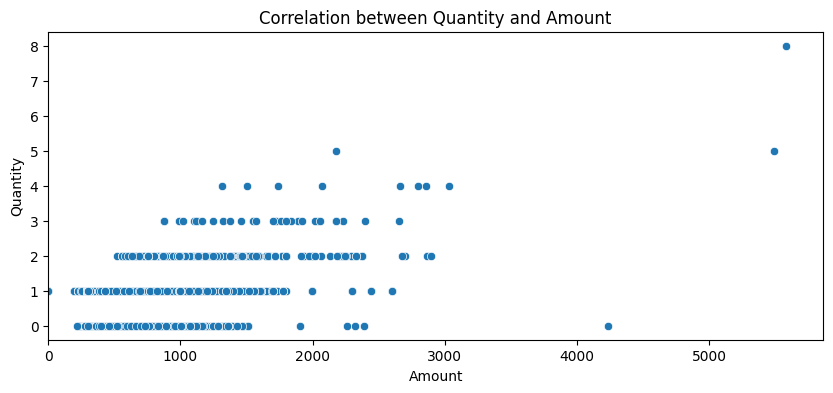

In [27]:
plt.figure(figsize=(10,4))
sns.scatterplot(x=sales_report_df['Amount'],y=sales_report_df['Qty'])
plt.xlim(left=0)
plt.title('Correlation between Quantity and Amount')
plt.xlabel('Amount')
plt.ylabel('Quantity')
plt.show()

# 3.2 Correlation between 'Qty' and 'Fulfilment'

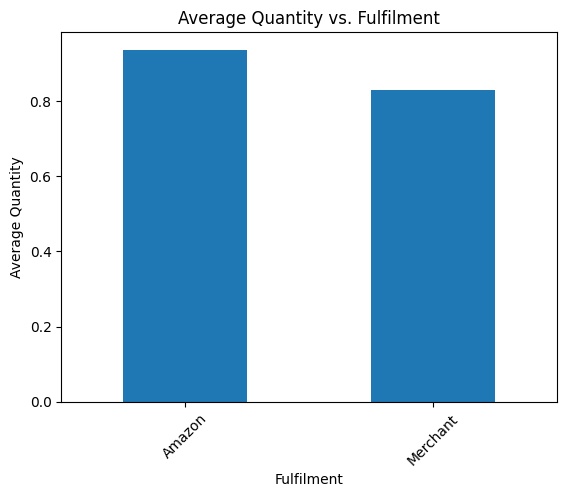

In [28]:
qty_fufil = sales_report_df.groupby('Fulfilment')['Qty'].mean()
qty_fufil.plot(kind='bar')
plt.xlabel('Fulfilment')
plt.ylabel('Average Quantity')
plt.title('Average Quantity vs. Fulfilment')
plt.xticks(rotation=45)
plt.show()

# 3.3 Correlation between 'Amount' and 'Sales Channel': Box plot or grouped bar chart

Text(0, 0.5, 'Amount')

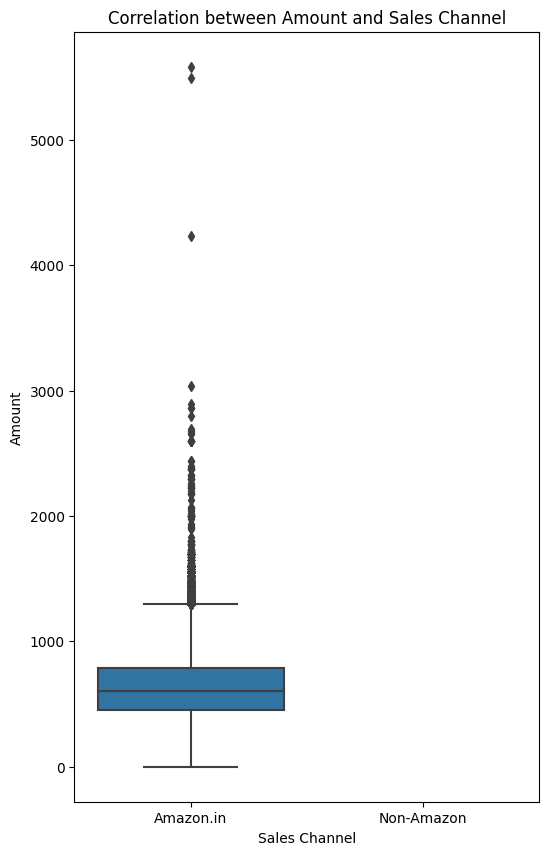

In [29]:
plt.figure(figsize=(6,10))
sns.boxplot(data=sales_report_df, x='Sales Channel ', y='Amount')
plt.title('Correlation between Amount and Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Amount')

# 3.4 Correlation between 'Amount' and 'ship-country'

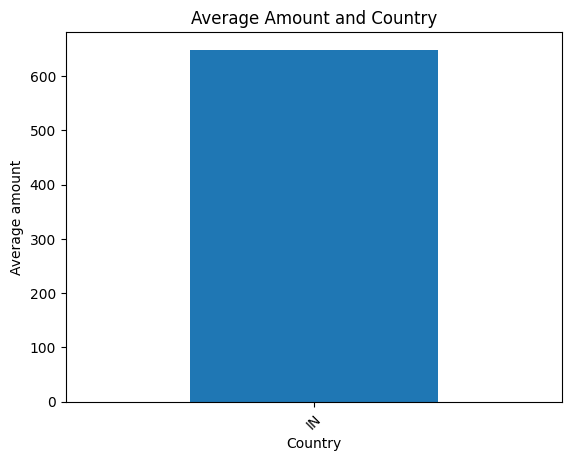

In [30]:
am_count = sales_report_df.groupby('ship-country')['Amount'].mean()
am_count.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Average amount')
plt.title('Average Amount and Country')
plt.xticks(rotation=45)
plt.show()

# 3.5 Correlation between 'Amount' and 'Size'

<Axes: xlabel='Size', ylabel='Amount'>

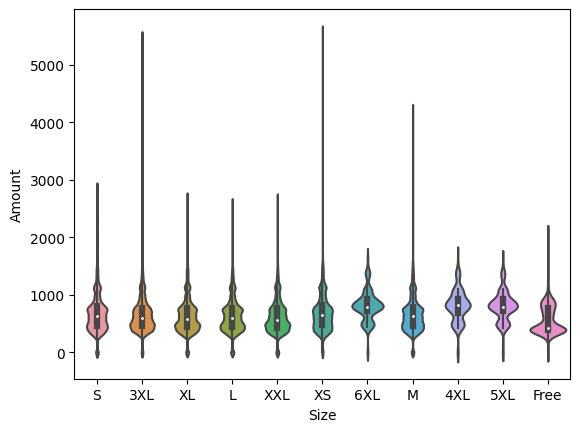

In [31]:
sns.violinplot(data=sales_report_df, x='Size', y='Amount')

# 3.6 Correlation between 'Amount' and 'ship-service-level'

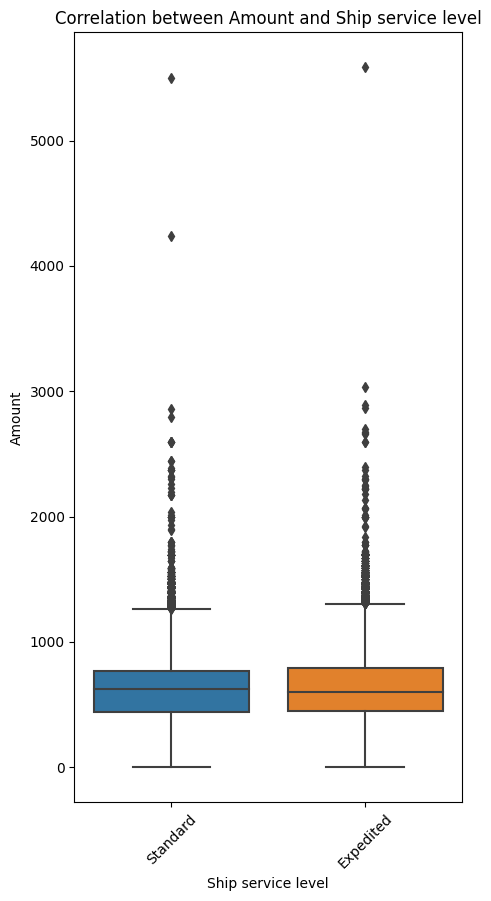

In [32]:
plt.figure(figsize=(5, 10))
sns.boxplot(data=sales_report_df, x='ship-service-level', y='Amount')
plt.title('Correlation between Amount and Ship service level')
plt.xlabel('Ship service level')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.show()

# 3.7 Correlation between 'Qty' and 'Courier Status'

<Figure size 500x1000 with 0 Axes>

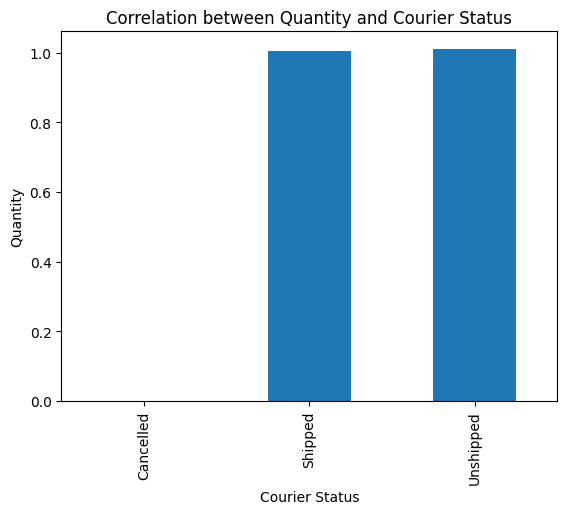

<Figure size 500x1000 with 0 Axes>

In [33]:
cour_qty = sales_report_df.groupby('Courier Status')['Qty'].mean()
cour_qty.plot(kind='bar')
plt.title('Correlation between Quantity and Courier Status')
plt.xlabel('Courier Status')
plt.ylabel('Quantity')
plt.figure(figsize=(5,10))

# 3.8 Time Series Analysis of Sales

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Amount')

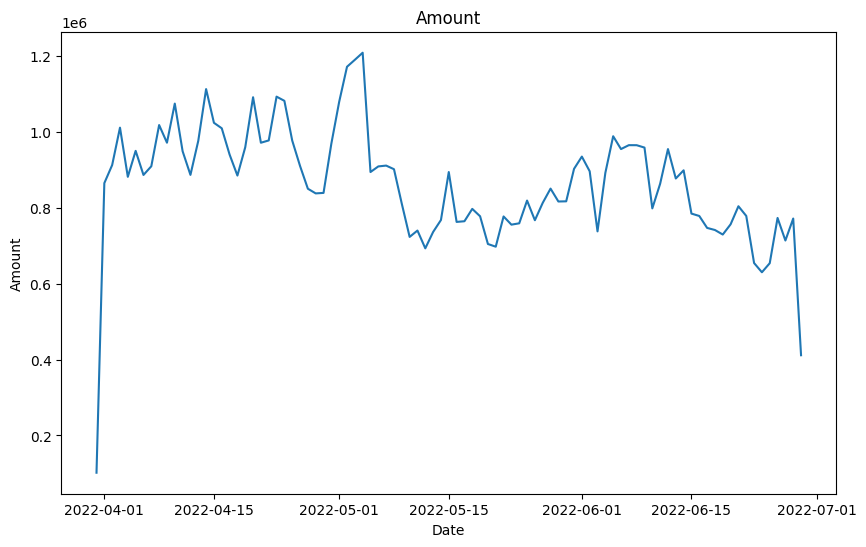

In [34]:
sales_report_df_agg = sales_report_df.groupby('Date').sum().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=sales_report_df_agg, y='Amount', x='Date')
plt.title('Amount')
plt.xlabel('Date')
plt.ylabel('Amount')

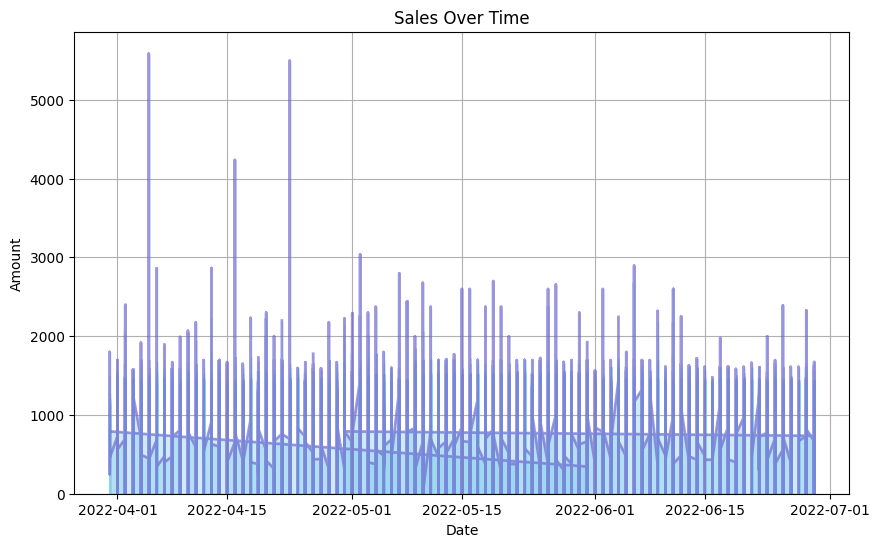

In [35]:
plt.figure(figsize=(10, 6))
plt.fill_between(sales_report_df['Date'], sales_report_df['Amount'], color="skyblue", alpha=0.4)
plt.plot(sales_report_df['Date'], sales_report_df['Amount'], color="Slateblue", alpha=0.6, linewidth=2)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.ylim(0, None)
plt.grid(True)
plt.show()

# 3.9 Correlation between 'Amount' and 'B2B'

Text(0, 0.5, 'Amount')

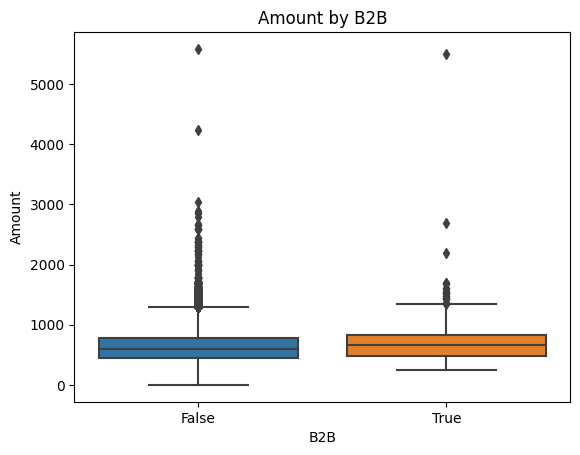

In [36]:
sns.boxplot(data=sales_report_df, x='B2B', y='Amount')
plt.title('Amount by B2B')
plt.xlabel('B2B')
plt.ylabel('Amount')

# 3.10 Correlation between 'Qty' and 'Fulfilment

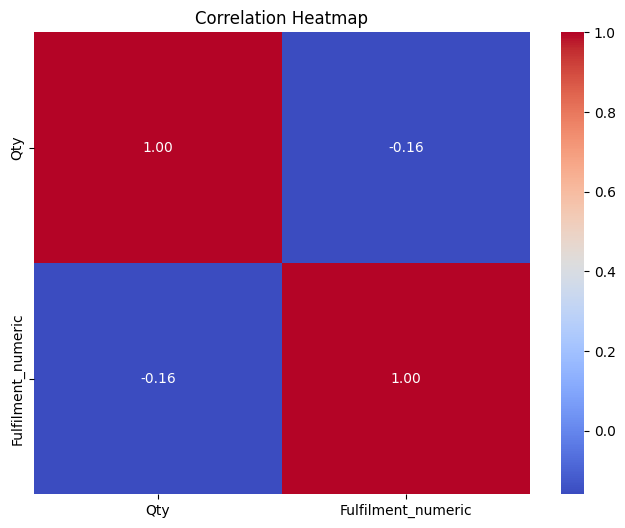

In [37]:
sales_report_df['Fulfilment_numeric'] = sales_report_df['Fulfilment'].astype('category').cat.codes
corr_matrix = sales_report_df[['Qty', 'Fulfilment_numeric']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3.11 Correlation between 'Amount' and 'fulfilled-by'

Text(0, 0.5, 'Amount')

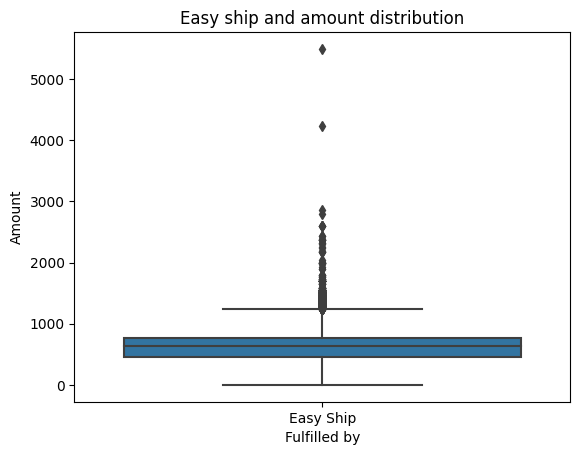

In [38]:
sns.boxplot(data=sales_report_df, x='fulfilled-by', y='Amount')
plt.title('Easy ship and amount distribution')
plt.xlabel('Fulfilled by')
plt.ylabel('Amount')

# 3.12 Category-wise Sales Distribution

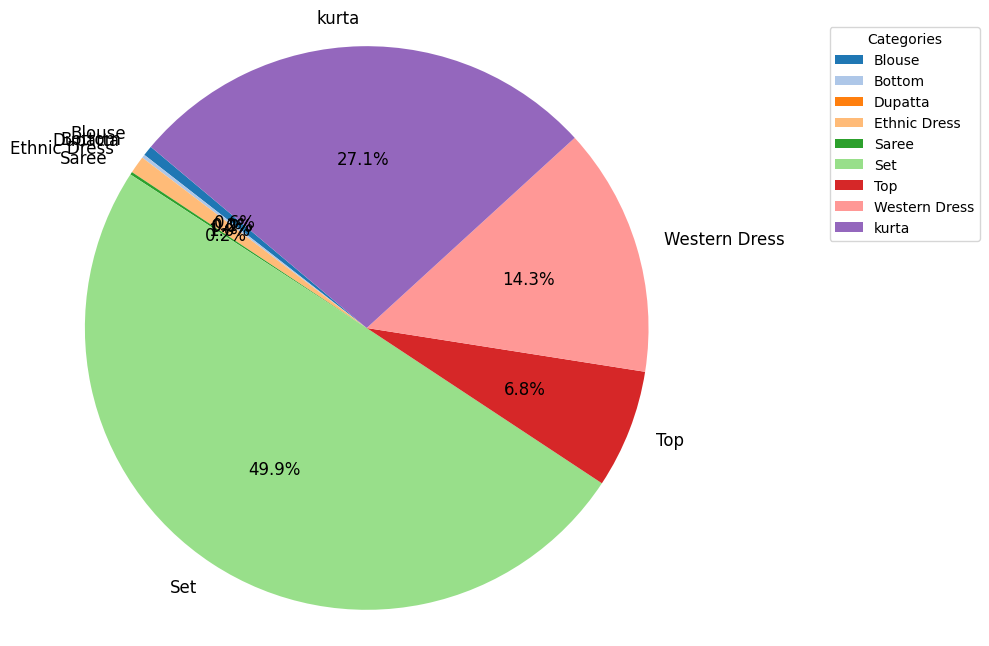

In [39]:
category_sales = sales_report_df.groupby('Category')['Amount'].sum()
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors
wedges, texts, autotexts = plt.pie(category_sales, labels=category_sales.index, 
                                   autopct='%1.1f%%', startangle=140, colors=colors)

for text in texts:
    text.set_fontsize(12)
for autotext in autotexts:
    autotext.set_fontsize(12)

plt.legend(wedges, category_sales.index, title="Categories", 
        loc="upper right", bbox_to_anchor=(1, 0, 0.5, 1))

plt.axis('equal')
plt.show()

# 3.13 Fulfillment Method Analysis

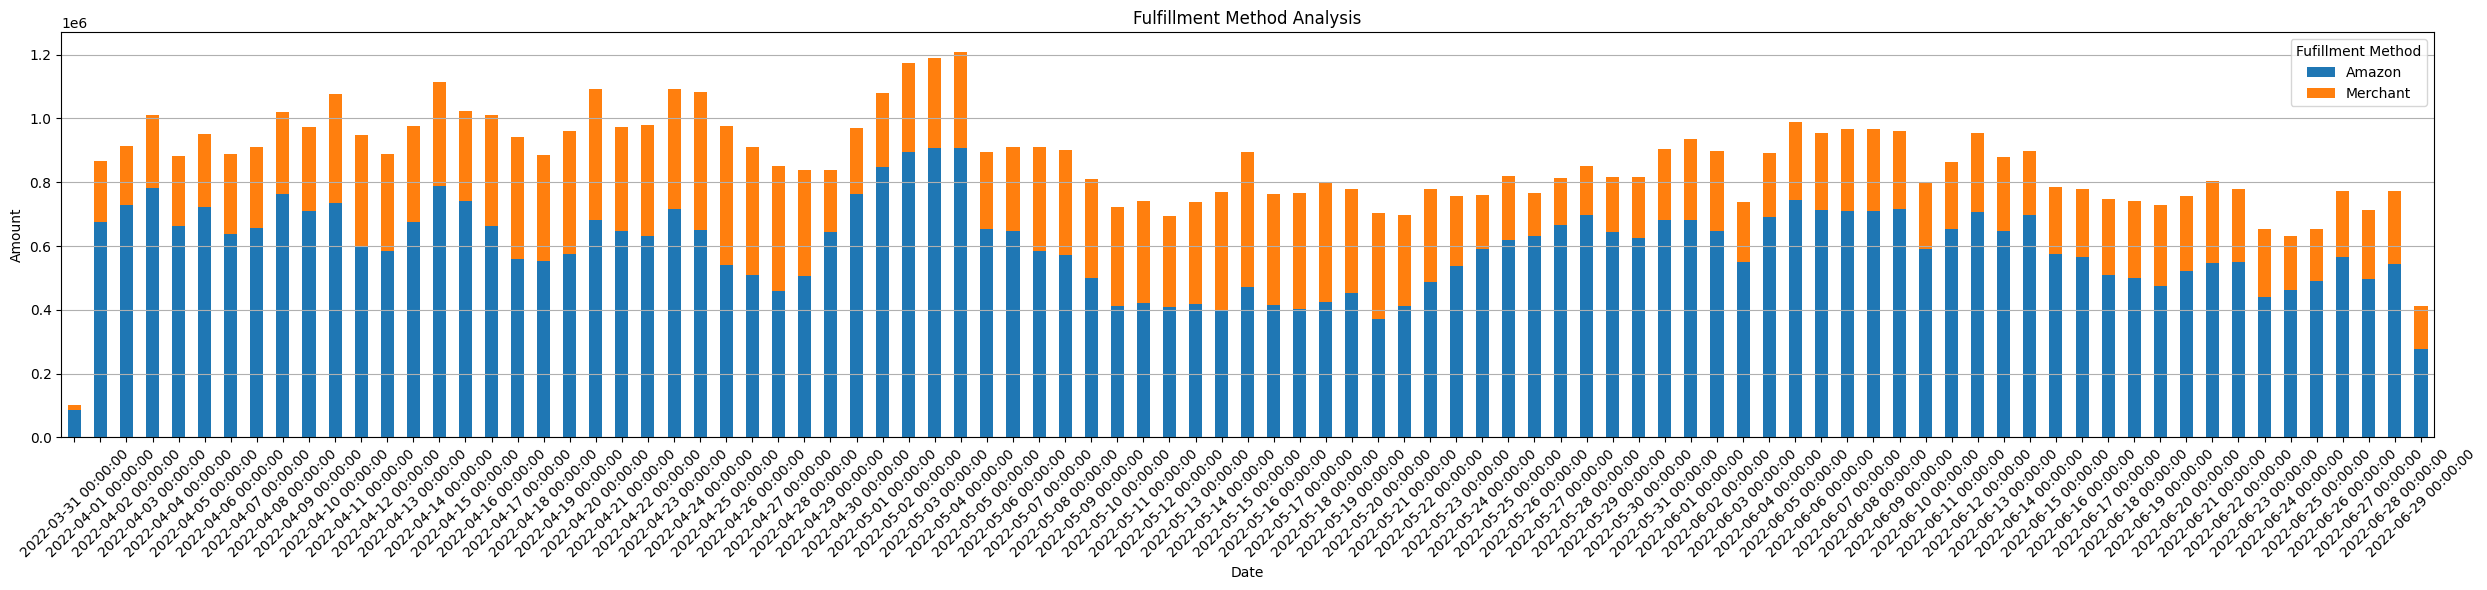

In [40]:
pivot_df = sales_report_df.pivot_table(index='Date', columns='Fulfilment', 
                                       values='Amount', aggfunc='sum')
pivot_df.plot(kind='bar', stacked=True, figsize=(25,6))
plt.title('Fulfillment Method Analysis')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='Fufillment Method')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# **Conclusion**

In this project, we analyzed a comprehensive dataset from Amazon's sales in India, consisting of approximately 130,000 rows and 21 columns. Key steps included reformatting the date column for effective plotting, focusing on relevant sales data, and creating insightful visualizations such as stacked bar charts for fulfillment methods and pie charts for category-wise sales distribution. Our analysis provided a deeper understanding of sales patterns, fulfillment methods, and category performance, which can aid in strategic decision-making and optimization of the e-commerce operations in the Indian market.